# Package Imports

In [5]:
# Typical Data Science and Machine Learning Stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# lots of depreciation warnings that don't matter
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client")
# specific package for MBA
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Reproducability (covers numpy and pandas as pandas just uses numpy's random)

In [6]:
np.random.seed(0)

# Data Import and Cleaning

I ran this the first time, its much faster to read this back in later from csv but the data is only in xlsx in UCI-ML repository

In [7]:
data = pd.read_excel('Online Retail.xlsx')


Export for later use

In [9]:
data.to_csv('online_retail.csv',index=False)

Read in the csv from 2nd run onward

In [10]:
#data = pd.read_csv('online_retail.csv')

## Brief examination

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
data = data[data['CustomerID'].notnull()]
data.shape

(406829, 8)

In [14]:
data = data[data['Quantity'] > 0]
data.shape

(397924, 8)

Remove the "return" orders as they aren't relevant to the sales

In [15]:
# First, convert InvoiceNo to string
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Now filter out cancellations (InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].str.startswith('C')]
data.shape

(397924, 8)

Brief glance to see what's there

In [16]:
display(data.sample(20))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
110408,545687,85197,SET OF 12 MINI BUNNIES IN A BUCKET,1,2011-03-06 12:20:00,2.10,17769.0,United Kingdom
465070,576212,22959,WRAP CHRISTMAS VILLAGE,25,2011-11-14 12:45:00,0.42,18082.0,United Kingdom
248766,558868,21238,RED RETROSPOT CUP,32,2011-07-04 12:47:00,0.85,13266.0,United Kingdom
288761,562204,84692,BOX OF 24 COCKTAIL PARASOLS,1,2011-08-03 12:54:00,0.42,16324.0,United Kingdom
94713,544406,22537,MAGIC DRAWING SLATE DINOSAUR,1,2011-02-18 13:26:00,0.42,16726.0,United Kingdom
377844,569568,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2011-10-05 09:57:00,2.95,12700.0,France
335,536401,21464,DISCO BALL ROTATOR BATTERY OPERATED,1,2010-12-01 11:21:00,4.25,15862.0,United Kingdom
495883,578333,23368,SET 12 COLOUR PENCILS DOLLY GIRL,16,2011-11-24 08:50:00,0.65,12471.0,Germany
503744,578935,23552,BICYCLE PUNCTURE REPAIR KIT,1,2011-11-27 12:52:00,2.08,15351.0,United Kingdom
164242,550637,22722,SET OF 6 SPICE TINS PANTRY DESIGN,2,2011-04-19 15:39:00,3.95,14415.0,United Kingdom


Leave out items we can't describe

In [17]:
data = data.dropna(subset=['Description'])
print('total remaining', len(data))

total remaining 397924


Look to see if descriptions are unique

In [18]:
# Group by 'StockCode' and get the unique descriptions for each 'StockCode'
inconsistent_descriptions = data.groupby('StockCode')['Description'].unique()

# Filter to show only those StockCodes with more than one unique description
inconsistent_descriptions = inconsistent_descriptions[inconsistent_descriptions.apply(len) > 1]


how bad is it...

In [19]:
for index in range(2,10):
  print("index",index)
  print(len(inconsistent_descriptions[inconsistent_descriptions.apply(len) == index]))



index 2
196
index 3
15
index 4
2
index 5
0
index 6
0
index 7
0
index 8
0
index 9
0


In [20]:
# Display the inconsistent descriptions
print('Number of inconsistent descriptions:', len(inconsistent_descriptions))
print(inconsistent_descriptions.sample(30))

Number of inconsistent descriptions: 213
StockCode
23041     [PAPER LANTERN 9 POINT SNOW STAR, PAPER LANTER...
23057     [GEMSTONE CHANDELIER T-LIGHT HOLDER, BEADED CH...
22952     [60 CAKE CASES VINTAGE CHRISTMAS, 72 CAKE CASE...
23191     [BUNDLE OF 3 RETRO NOTE BOOKS, BUNDLE OF 3 RET...
22985     [WRAP, BILLBOARD FONTS DESIGN, WRAP BILLBOARD ...
22602     [CHRISTMAS RETROSPOT HEART WOOD, RETROSPOT WOO...
23251     [VINTAGE RED ENAMEL TRIM MUG , ENAMEL MUG PANTRY]
81950V    [FLOWER PURPLE CLOCK W/SUCKER, FLOWER PURPLE C...
22632     [HAND WARMER RED POLKA DOT, HAND WARMER RED RE...
23244     [ROUND STORAGE TIN VINTAGE LEAF, STORAGE TIN V...
23237     [SET OF 4 KNICK KNACK TINS LEAVES , SET OF 4 K...
23235     [STORAGE TIN VINTAGE LEAF, BISCUIT TIN VINTAGE...
85184C    [S/4 VALENTINE DECOUPAGE HEART BOX, SET 4 VALE...
22179     [SET 10 LIGHTS NIGHT OWL, SET 10 NIGHT OWL LIG...
23306     [SET OF 36 DOILIES PANTRY DESIGN, SET OF 36 PA...
21175     [GIN + TONIC DIET METAL SIGN, GIN AND T

delete the bad ones?

In [21]:
# Group by 'StockCode' and get the unique descriptions for each 'StockCode'
inconsistent_descriptions = data.groupby('StockCode')['Description'].unique()

# Filter to show only those StockCodes with more than one unique description
inconsistent_descriptions = inconsistent_descriptions[inconsistent_descriptions.apply(len) > 2]
# Get the StockCodes with >2 inconsistent descriptions
bad_stockcodes = inconsistent_descriptions.index

# Drop the rows with those StockCodes from df_clean
data = data[~data['StockCode'].isin(bad_stockcodes)]

still enough data?  Yes, plenty

In [22]:
data.shape

(392726, 8)

In [23]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Group by InvoiceNo, then see the plaintext instead of the StockCode

In [24]:
basket = data.groupby(['InvoiceNo'])['Description'].apply(list).reset_index()
transactions = basket['Description'].tolist()


Total transactions in the data

In [25]:
len(transactions)

18527

Look at a few to make sure this all worked

In [26]:
for n in range(0,10):
  index = np.random.randint(0,len(transactions))
  print(transactions[index])

['HOT WATER BOTTLE KEEP CALM', 'ANTIQUE SILVER T-LIGHT GLASS', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'IVORY KNITTED MUG COSY ', 'WOODEN BOX OF DOMINOES', 'PLAYING CARDS KEEP CALM & CARRY ON', 'HAND WARMER RED RETROSPOT']
['DOORMAT WELCOME TO OUR HOME', 'DOORMAT SPOTTY HOME SWEET HOME', 'DOORMAT HEARTS', 'FRENCH CARRIAGE LANTERN', 'BOX OF 6 MINI VINTAGE CRACKERS', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'GINGHAM RECIPE BOOK BOX', 'RABBIT NIGHT LIGHT', 'TREASURE TIN GYMKHANA DESIGN', 'DOORSTOP RETROSPOT HEART', 'WOOD BLACK BOARD ANT WHITE FINISH', 'VINTAGE DOILY DELUXE SEWING KIT ', "3 RAFFIA RIBBONS 50'S CHRISTMAS ", 'SET OF 3 REGENCY CAKE TINS', 'VINTAGE CHRISTMAS GIFT SACK', 'VINTAGE CHRISTMAS TABLECLOTH', 'VINTAGE CHRISTMAS STOCKING ', 'PAPER CHAIN KIT VINTAGE CHRISTMAS', 'BISCUIT TIN VINTAGE CHRISTMAS', '6 GIFT TAGS VINTAGE CHRISTMAS ', 'SET OF 20 VINTAGE CHRISTMAS NAPKINS', 'RETROSPOT WOODEN HEART DECORATION', 'SET OF 2 TRAYS HOME SWEET HOME', 'WHITE SKULL HOT WATER BOTTLE ', 'SCOTTIE D

## Encode the cleaned up dataset

following:  https://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [27]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
data_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [28]:
display(data_encoded.sample(5))

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
13517,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Market Basket Analysis

## Apriori to get Frequent Itemsets

Following:  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [29]:
# needed the 0.015 filter so that items are in more than 1.5% of invoices
# any lower and apriori ate up all the memory and crashedt
frequent_itemsets = apriori(data_encoded, min_support=0.015, use_colnames=True)
number_of_itemsets = frequent_itemsets.shape[0]
print("Number of Itemsets:", number_of_itemsets)

Number of Itemsets: 435


Sampling a few to see what we found

In [30]:
for n in range(0,10):
  index = np.random.randint(0,number_of_itemsets)
  print(frequent_itemsets.iloc[index])
  print()

support                          0.017056
itemsets    (CHILDRENS CUTLERY SPACEBOY )
Name: 50, dtype: object

support                        0.018082
itemsets    (SCANDINAVIAN REDS RIBBONS)
Name: 256, dtype: object

support                          0.043774
itemsets    (WOODEN FRAME ANTIQUE WHITE )
Name: 337, dtype: object

support                               0.030874
itemsets    (HANGING HEART JAR T-LIGHT HOLDER)
Name: 107, dtype: object

support                                 0.034274
itemsets    (GARDENERS KNEELING PAD CUP OF TEA )
Name: 90, dtype: object

support                                              0.015653
itemsets    (HEART OF WICKER LARGE, WHITE HANGING HEART T-...
Name: 366, dtype: object

support                 0.024235
itemsets    (RED KITCHEN SCALES)
Name: 226, dtype: object

support                               0.030874
itemsets    (HANGING HEART JAR T-LIGHT HOLDER)
Name: 107, dtype: object

support                     0.041669
itemsets    (JUMBO BAG VINTAGE LE

Look at the itemsets by sizes

In [31]:
# just add a count columnt to filter by, similar to tutorial
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


See how big these get..dont want huge clusters

In [32]:
for index in range(2,5):
  print("index",index)
  print(len(frequent_itemsets[frequent_itemsets['length']== index]))


index 2
82
index 3
4
index 4
0


Filter out some interesting ones

In [33]:
# 2-itemsets
frequent_itemsets_2 = frequent_itemsets[frequent_itemsets['length'] == 2]

# 3-itemsets
frequent_itemsets_3 = frequent_itemsets[frequent_itemsets['length'] == 3]

Sample a few

In [34]:
for n in range(10):
  index = np.random.randint(0,len(frequent_itemsets_2))
  display(frequent_itemsets_2.iloc[index])
  print()

,392
support,0.015653
itemsets,"(LUNCH BAG CARS BLUE, LUNCH BAG APPLE DESIGN)"
length,2


,349
support,0.015113
itemsets,"(PACK OF 60 PINK PAISLEY CAKE CASES, 60 TEATIM..."
length,2


,414
support,0.02186
itemsets,"(LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN )"
length,2


,378
support,0.022346
itemsets,"(JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT)"
length,2


,370
support,0.01684
itemsets,"(JUMBO BAG PEARS, JUMBO BAG APPLES)"
length,2


,387
support,0.027905
itemsets,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."
length,2


,397
support,0.016408
itemsets,"(LUNCH BAG VINTAGE LEAF DESIGN, LUNCH BAG APPL..."
length,2


,368
support,0.019539
itemsets,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."
length,2


,419
support,0.015059
itemsets,"(PARTY BUNTING, WHITE HANGING HEART T-LIGHT HO..."
length,2


,411
support,0.024289
itemsets,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN )"
length,2


Not many here

In [35]:
display(frequent_itemsets_3)

,support,itemsets,length
431,0.021050,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",3
432,0.016840,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",3
433,0.016624,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",3
434,0.015059,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...",3


## Association Rules

Look for specific rules

In [36]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
# this was hard to get coded.  I just struggle with labmdas in python
# probably a better way, but this is like the tutorial
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]


look at a few of the rules we found

In [37]:
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 188


,antecedents,consequents,support,confidence,lift
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.015113,0.418535,11.802436
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.015113,0.426180,11.802436
2,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.017812,0.320700,9.043537
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.017812,0.502283,9.043537
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.018514,0.434728,13.138983


I care about lift the most, sort on it

In [38]:
# Sort rules by lift descending
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Pull top 10 for display
top_rules = rules_sorted[['antecedents','consequents','support','confidence','lift']].head(10)

# Display nicely
display(top_rules)



,antecedents,consequents,support,confidence,lift
163,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.017218,0.688985,29.479960
162,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.017218,0.736721,29.479960
167,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.021050,0.701439,24.021363
166,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.021050,0.720887,24.021363
165,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.021050,0.894495,23.983092
168,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.021050,0.564399,23.983092
25,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024829,0.665702,22.182480
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024829,0.827338,22.182480
164,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.021050,0.847826,20.060886
169,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.021050,0.498084,20.060886


Kinda circular, so filter

In [39]:
circular_rules = []
for index in range(len(rules)):
  a = rules.iloc[index]['antecedents']
  b = rules.iloc[index]['consequents']
  # use pythong set since order doesnt matter
  # combine = set(a + b)  # this wasn't working>?
  combine = a.union(b)
  circular_rules.append(combine)
# I think I can just add this instead of using the index later?
rules['circular'] = circular_rules


Delete by that new column

In [40]:
# Remove circular duplicates
unique_rules = rules.drop_duplicates(subset='circular')

# Drop added column, not sure i needed it?
unique_rules = unique_rules.drop(columns='circular')

In [41]:
# sort, same as before
unique_rules_sorted = unique_rules.sort_values(by='lift', ascending=False)

# Pull top 10 for display
top_rules2 = unique_rules_sorted[['antecedents','consequents','support','confidence','lift']].head(10)

# Display nicely
display(top_rules2)

,antecedents,consequents,support,confidence,lift
162,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.017218,0.736721,29.479960
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024829,0.827338,22.182480
164,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.021050,0.847826,20.060886
170,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.016840,0.834225,19.739054
30,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.015167,0.491259,19.323887
144,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.023533,0.784173,18.554747
28,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029201,0.782923,18.525185
20,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.022886,0.602273,18.114134
22,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.024991,0.729134,17.868602
68,(LARGE WHITE HEART OF WICKER),(SMALL WHITE HEART OF WICKER),0.015167,0.549902,17.505219


# Visuals

Some quick visuals

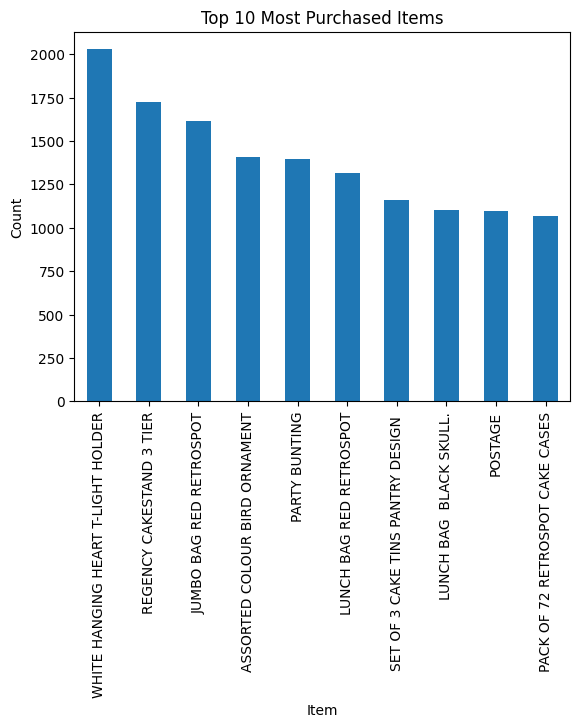

<Figure size 640x480 with 0 Axes>

In [44]:
# Count the top 10 most purchased items
top_items = data['Description'].value_counts().head(10)

# Plot as a bar chart
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()
plt.savefig('top_items.png')

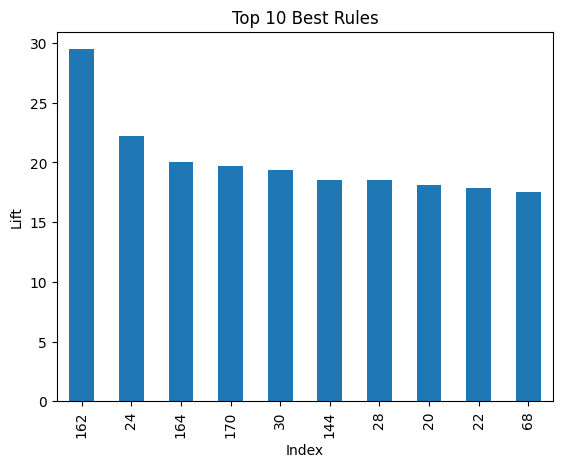

<Figure size 640x480 with 0 Axes>

In [45]:
# Pick top 10 rules by lift
top_rules_plot = unique_rules['lift'].sort_values(ascending=False).head(10)

# Plot as a bar chart
top_rules_plot.plot(kind='bar', title='Top 10 Best Rules')
plt.xlabel("Index")
plt.ylabel("Lift")
plt.show()
plt.savefig('top_rules.png')